# Neural Network
"B Sprint10 assignment Deep Learning Scratch Neural Networks"

[Link](https://diver.diveintocode.jp/curriculums/1876)

In [418]:
import numpy as np

## [Problem 1] 
Create a code that determines the initial value of the weight
>Write the code that determines the initial weights for each layer of the neural network.

In [419]:
np.random.seed(0)

In [420]:
def initialize_weights(n_features, n_nodes, sigma, n_round = -1):
    W = sigma * np.random.randn(n_features, n_nodes)
    return W.round(n_round) if n_round > 0 else W

def initialize_bias(n_nodes, sigma, n_round = -1):
    B = sigma * np.random.randn(n_nodes)
    return B.round(n_round) if n_round > 0 else B

# Test
test_sigma = 0.1
n_features = 2
n_nodes = 3
sigma = 0.01 

In [421]:
initialize_weights(n_features, n_nodes, sigma)

array([[ 0.01764052,  0.00400157,  0.00978738],
       [ 0.02240893,  0.01867558, -0.00977278]])

In [422]:
initialize_bias(n_nodes, sigma)

array([ 0.00950088, -0.00151357, -0.00103219])

In [423]:
# with rounding
initialize_weights(n_features, n_nodes, sigma, n_round = 1)

array([[0., 0., 0.],
       [0., 0., 0.]])

## [Description]
**In the next three problems (problem 2 & 3 & 4)**
```
I will walk you through each layer calculations one by one 
From input (X) and Initializations (Weights-W_i, Bias-B_i) 
-> to pre-activations (A_i) -> to post-activations layer output (Z_i) 
-> to final probabilities (Z_n) -> then finally labels (Y) and loss function (L)
```
And then back around for back-propagation

## [Problem 2] 
Implementation of forward propagation

> Create forward propagation of a three-layer neural network . In the explanation below, the number of nodes is 400 for the first layer and 200 for the second layer, but you can change it.

Sample Input ($X$)

> feature vector (batch_size, n_features)

In [424]:
X = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
X

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Hyper params for our (sample) network

In [425]:
batch_size = X.shape[0] # batch size
n_features = X.shape[1] # number of features of input
n_nodes1 = 2 # number of nodes in the first layer
n_nodes2 = 3 # number of nodes in the second layer
n_output = 2 # number of output classes (number of nodes in the 3rd layer)
sigma = 1 # Gaussian standard deviation

### Initial Weight and Biases 

($W_{1,2,3}$ and $B_{1,2,3}$)

Initial weights here are rounded for smoother numbers 

$W_1$ : 1st layer weight (n_features, n_nodes1)

In [426]:
W1 = initialize_weights(n_features, n_nodes1, sigma, n_round = 1)
W1

array([[ 0.3,  1.5],
       [-0.2,  0.3],
       [-0.9, -2.6]])

$B_1$ : 1st layer bias (n_nodes1,)

In [427]:
B1 = initialize_bias(n_nodes1, sigma, n_round = 1)
B1

array([0.7, 0.9])

$W_2$ : 2nd layer weight (n_nodes1, n_nodes2)



In [428]:
W2 = initialize_weights(n_nodes1, n_nodes2, sigma, n_round = 1)
W2

array([[-0.7,  2.3, -1.5],
       [ 0. , -0.2,  1.5]])

$B_2$ : 2nd layer bias (n_nodes2,)



In [429]:
B2 = initialize_bias(n_nodes2, sigma, n_round = 1)
B2

array([1.5, 0.2, 0.4])

$W_3$ : 3rd layer weight (n_nodes2, n_output)



In [430]:
W3 = initialize_weights(n_nodes2, n_output, sigma, n_round = 1)
W3

array([[-0.9, -2. ],
       [-0.3,  0.2],
       [ 1.2,  1.2]])

$B_3$ : 3rd layer bias (n_output,)



In [431]:
B3 = initialize_bias(n_output, sigma, n_round = 1)
B3

array([-0.4, -0.3])

### Latex helper functions

**Why latex?**

Cause I hope you (as my readers) can more easily follow the formula and how they are calculated

In [432]:
from IPython.display import Latex

def showLatexEquation(equation_string):
    '''
        Wrap a latex equation string between <align> tag and display it as Latex
    '''
    latex_string = '\n'.join((
        r'\begin{align*}',
        equation_string,
        r'\end{align*}'
    ))
    return display(Latex(latex_string))

In [433]:
def format_str(nd_array: np.ndarray):
    '''
        convert numpy array to latex compatible string format
    '''
    formatted_array = np.array2string(nd_array, separator=' & ').replace("&\n", r"\\")
    formatted_array = '\n'.join((
        '\n',
        r'\begin{matrix}',  
        f'{formatted_array}',
        r'\end{matrix}',
        '\n',
    ))
    return formatted_array

### First Layer

$A_1$ : layer 1 pre-activation (batch_size, n_nodes1)

In [434]:
A1 = np.matmul(X, W1) + B1

showLatexEquation(
    f'A_1 = X \\cdot W_1 + B_1 '
    f'= {format_str(X)}  \\times {format_str(W1)}  + B_1'
)
showLatexEquation(
    f'= {format_str(np.matmul(X, W1))}  + {format_str(B1)}'
    f'= {format_str(A1)}'
)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


**NOTE**

About: 
$$
    A = W \cdot X + B
$$
1. The plus ($+$) notation between $X \cdot W$ and $B$ is not matrix addition
2. Because if you notice, $X \cdot W$ has shape (batch_size ,n_nodes) and $B$ has shape (n_nodes,)
3. Which means a matrix addition would be invalid
4. This is actually more of a convenient notation of a `broadcasted addition` in `numpy`

**Activation functions**

**NOTE**

- For demonstration purposes well use identify function for inner layers' activation as to not make the numbers become too complex
- Softmax is used for final layer
- I'll implement Tanh/Sigmoid later

In [435]:
def identify_func(x): return x
def softmax(X):
    return np.exp(X) / np.sum(np.exp(X), axis = 1).reshape(-1,1)

$Z_1$: layer 1 output (batch_size, n_nodes1)

In [436]:
activation1 = identify_func
Z1 = activation1(A1)
showLatexEquation(
    f'Z_1 = f_1(A_1) = id(A_1) '
    f'= {format_str(Z1)}'
)

<IPython.core.display.Latex object>

### Second layer
> Similarly

$A_2$ : layer 2 pre-activation (batch_size, n_nodes2)

In [437]:
A2 = np.matmul(Z1, W2) + B2

showLatexEquation(
    f'A_2 = Z_1 \\cdot W_2 + B_2 '
    f'= {format_str(Z1)}  \\times {format_str(W2)}  + B_2'
)

showLatexEquation(
    f'= {format_str(np.matmul(Z1, W2))}  + {format_str(B2)}'
    f'= {format_str(A2)}'
)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

$Z_2$: layer 2 output (batch_size, n_nodes2)



In [438]:
Z2 = identify_func(A2)
showLatexEquation(f'Z_2 = id(A_2) = {format_str(Z2)}')

<IPython.core.display.Latex object>

### Third layer
> Last layer

$A_3$ : Layer 3 pre-activation (batch_size, n_output)

In [439]:
A3 = np.matmul(Z2, W3) + B3

showLatexEquation(
    f'A_3 = Z_2 \\cdot W_3 + B_3 '
    f'= {format_str(Z2)}  \\times {format_str(W3)}  + B_3'
)
showLatexEquation(
    f'= {format_str(np.matmul(Z2, W3))}  + {format_str(B3)}'
    f'= {format_str(A3)}'
)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Gotta soft max here to turn it into 'probability'

> so that we can test our loss (next part)

$Z_3$ layer 3 output (batch_size, n_output)

$Z_3$ is the representation of probabilities for each label

In [440]:
Z3 = softmax(A3)
showLatexEquation(f'Z_3 = softmax(A_3) = {format_str(Z3)}')

<IPython.core.display.Latex object>

In [441]:
# quick check
Z3.sum(axis=1) # sums to 1 -> valid!

array([1., 1., 1.])

## [Problem 3] 
Implementation of cross-entropy error

> Create an objective function (loss function).

### Cross-entropy error
The cross-entropy error $L$, the objective function for multiclass classification, is the following formula:

$$
L = - \frac{1}{n_b} \sum^{n_b}_{i} \sum^{n_c}_{j} y_{ij} \log(z_{3_{ij}})
$$

Where

$n_{b}$ : batch size (batch_size)

$n_{c}$ : number of classes (n_output)

In [442]:
def cross_entropy_error(Z,y):
    return (np.log(Z) * y).sum() / (- len(Z))

### Test
> with random generated one-hots

In [443]:
'''
    Y is label vector, one-hot format
    We create a random_one_hots by making an identify matrix and pick random rows from it
'''
random_one_hots = np.eye(n_output)[np.random.randint(0, n_output, batch_size)]
Y = random_one_hots
Y 

array([[1., 0.],
       [0., 1.],
       [0., 1.]])

In [444]:
print('Cross-Entropy: ')
cross_entropy_error(Z3, Y)

Cross-Entropy: 


7.704929432141037

In [445]:
# validate our code with sklearn's implementation
from sklearn.metrics import log_loss
print('sklearn result: ', log_loss(Y, Z3, normalize=True))

sklearn result:  7.704929432141037


## [Problem 4] 
Implementation of back propagation

Weight and bias update formula:
$$
    W^{'}_i = W_i - \alpha \frac{\partial L}{\partial W_i} \\
    B^{'}_i = B_i - \alpha \frac{\partial L}{\partial B_i}
$$

Where 

$\frac{\partial L}{\partial W_i}$ : Gradient of loss $L$ with respect to $W_i$

$\frac{\partial L}{\partial B_i}$ : Gradient of loss $L$ with respect to $B_i$

**Let's walk together through the gradient calculation process of the 3 layers in our network**

> since it's backpropagation (gradient decent), we'll be walking from the last layer to the first layer

### Third Layer

<hr />



Gradient of loss $L$ with respect to $A_3$ (batch_size, n_output)
$$
    \frac{\partial L}{\partial A_3}
    = 
    \frac{1}{n_b} (Z_3 - Y)
$$

where $n_b$ is batch size

In [446]:
nb = batch_size
grad_L_A3 = (Z3 - Y)/ nb

showLatexEquation(
    r'\frac{\partial L}{\partial A_3} = '
    fr'\frac{{1}}{nb} ({format_str(Z3)} - {format_str(Y)})'
)

showLatexEquation(
    f' = {format_str(grad_L_A3)}'
)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<hr />



Gradient of loss $L$ with respect to $B_3$ (n_output,)
$$
    \frac{\partial L}{\partial B_3}
    = \sum^{n_b}_{j} \frac{\partial L}{\partial A_{3_{\_j}}}    
$$ 
Where 
$\frac{\partial L}{\partial A_{3_j}}$ : Gradient of loss $L$ with respect to $A_3$ of j-th sample (n_output,)

> This formula is basically equivalent to sum over axis 0 (over rows) 

In [447]:
grad_L_B3 = np.sum(grad_L_A3, axis=0)
showLatexEquation(
    r'\frac{\partial L}{\partial B_3} = '
    f'{format_str(grad_L_B3)}'
)

<IPython.core.display.Latex object>

<hr/>

Gradient of loss $L$ with respect to $W_3$ (n_nodes2, n_output)
$$
\frac{\partial L}{\partial W_3}
=
Z^T_2 \cdot \frac{\partial L}{\partial A_3}
$$

In [448]:
grad_L_W3 = np.matmul(Z2.T, grad_L_A3)

showLatexEquation(
    r'\frac{\partial L}{\partial W_3} ='
    f'{format_str(Z2)}^T \\cdot '
    r'\frac{\partial L}{\partial A_3}'
)

showLatexEquation(
    f'= {format_str(Z2.T)} \\cdot {format_str(grad_L_A3)}'
)

showLatexEquation(
    f'= {format_str(grad_L_W3)}'
)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<hr/> 

Gradient of loss $L$ with respect to $Z_2$ (batch_size, n_nodes2)

$$
\frac{\partial L}{\partial Z_2}
=
\frac{\partial L}{\partial A_3} \cdot W^T_3
$$

In [449]:
grad_L_Z2 = np.matmul(grad_L_A3, W3.T)

showLatexEquation(
    r'\frac{\partial L}{\partial Z_2} ='
    r'\frac{\partial L}{\partial A_3} \cdot '
    f'{format_str(W3)}^T'
)

showLatexEquation(
    f'= {format_str(grad_L_A3)} \\cdot {format_str(W3.T)}'
)

showLatexEquation(
    f'= {format_str(grad_L_Z2)}'
)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Second Layer

<hr />


Gradient of loss $L$ with respect to $A_2$ (batch_size, n_nodes2)
$$
\frac{\partial L}{\partial A_2}
=
\frac{\partial L}{\partial Z_2}
\cdot
\frac{\partial Z_2}{\partial A_2}

\text{ (Chain rule)}
$$

And since in the previous section, we've assumed (for simplicity) that middle layers' activation is identity function: 

$$
Z_2 = id(A_2) = A_2 
\Rightarrow 
\frac{\partial Z_2}{\partial A_2}
= 
I \text{ (identify matrix)}
$$

So

$$
\frac{\partial L}{\partial A_2}
=
\frac{\partial L}{\partial Z_2}
$$

Note:
```
We'll establish back-propagation for tanh/sigmoid activation functions later
```

In [450]:
grad_L_A2 = grad_L_Z2
showLatexEquation(
    r'\frac{\partial L}{\partial A_2}'
    f'= {format_str(grad_L_A2)}'
)

<IPython.core.display.Latex object>

<hr/>


Gradient of loss $L$ with respect to $B_2$ (n_nodes2,)

> similar to that of $B_3$
$$
\frac{\partial L}{\partial B_2}
=
\sum_j^{n_b}
\frac{\partial L}{\partial A_{2_{\_j}}}
$$

In [451]:
# Just sum over rows
grad_L_B2 = np.sum(grad_L_A2, axis=0)
showLatexEquation(
    r'\frac{\partial L}{\partial B_2} = '
    f'{format_str(grad_L_B2)}'
)

<IPython.core.display.Latex object>

<hr/>

Gradient of loss $L$ with respect to $W_2$ (n_nodes1, n_nodes2)

$$
\frac{\partial L}{\partial W_2}
=
Z_1^T \cdot \frac{\partial L}{\partial A_2}
$$

In [452]:
grad_L_W2 = np.matmul(Z1.T, grad_L_A2)

showLatexEquation(
    r'\frac{\partial L}{\partial W_2} ='
    f'{format_str(Z1)}^T \\cdot '
    r'\frac{\partial L}{\partial A_2}'
)

showLatexEquation(
    f'= {format_str(Z1.T)} \\cdot {format_str(grad_L_A2)}'
)

showLatexEquation(
    f'= {format_str(grad_L_W2)}'
)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<hr/>

Gradient of loss $L$ with respect to $Z_1$ (batch_size, n_nodes2)

$$
\frac{\partial L}{\partial Z_1}
=
\frac{\partial L}{\partial A_2} \cdot W_2^T
$$

In [453]:
grad_L_Z1 = np.matmul(grad_L_A2, W2.T)

showLatexEquation(
    r'\frac{\partial L}{\partial Z_1} ='
    r'\frac{\partial L}{\partial A_2} \cdot '
    f'{format_str(W2)}^T'
)

showLatexEquation(
    f'= {format_str(grad_L_A2)} \\cdot {format_str(W2.T)}'
)

showLatexEquation(
    f'= {format_str(grad_L_Z1)}'
)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### First Layer

<hr />


Similar to $A_2$, activation function of first layer is identity function
$$
\frac{\partial L}{\partial A_1}
=
\frac{\partial L}{\partial Z_1}
$$

In [454]:
grad_L_A1 = grad_L_Z1
showLatexEquation(
    r'\frac{\partial L}{\partial A_1}'
    f'= {format_str(grad_L_A1)}'
)

<IPython.core.display.Latex object>

<hr/>

Gradient of loss $L$ with respect to $B_1$ (n_nodes1,)
> again, similar to the other $B_j$
$$
\frac{\partial L}{\partial B_1}

= \sum_j^{n_b} \frac{\partial L}{\partial A_{1_{\_j}}}
$$ 

In [455]:
# Just sum over rows
grad_L_B1 = np.sum(grad_L_A1, axis=0)
showLatexEquation(
    r'\frac{\partial L}{\partial B_1} = '
    f'{format_str(grad_L_B1)}'
)

<IPython.core.display.Latex object>

<hr/>

Gradient of loss $L$ with respect to $W_1$ (n_features, n_nodes1)

$$
\frac{\partial L}{\partial W_1}
=
X^T \cdot
\frac{\partial L}{\partial A_1}
$$

In [456]:
grad_L_W1 = np.matmul(X.T, grad_L_A1)

showLatexEquation(
    r'\frac{\partial L}{\partial W_1} ='
    f'{format_str(X)}^T \\cdot '
    r'\frac{\partial L}{\partial A_1}'
)

showLatexEquation(
    f'= {format_str(X.T)} \\cdot {format_str(grad_L_A1)}'
)

showLatexEquation(
    f'= {format_str(grad_L_W1)}'
)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## [Improvement]
Having walked through all the mathematics, now,

`Let us improve our implementation by abstraction`

We will be:
1. Implement major component of our network into layers/classes 
2. These classes have 
   - `forward`: calculate and predict
   - `backward`: gradient decent (derivative) and update
3. These major components include:
   - activation function
   - neuron

Why and How?

- To simplify our code. With this approach, we are utilizing `gradient flow` by taking advantage of the derivative `chain rule` to easily and effectively implement our neural network.
- This allows us to not get caught up on the complexity of math equation in our code since big components are separated from each other 
- And the back-propagation will be easy to understand + simple to implement thanks to the help of `Chain Rule`

Let's tackle neuron $\rightarrow$ activation function $\rightarrow$ loss function (already implemented) $\rightarrow$ and then testing to make sure result matches our expected results 

In [457]:
class Layer:
    '''
        Base class for all layer classes
    '''
    def forward(self, X, training=True):
        '''
            Forward propagation calculation.
            If training is True -> could save some value for back propagation
            else -> just do the calculation
        '''
        raise NotImplementedError
    def backward(self, gradient):
        '''
            Backward propagation calculation.
            Use the saved value from training forward propagation
            to calculate the gradient flow and return the result
            to propagate to previous layer (if any)
        '''
        raise NotImplementedError

### Neuron

In [458]:
class Neuron(Layer):
    def __init__(self, 
        n_features, n_nodes, sigma = 0.1, alpha = 0.01, 
        init_weight = None, init_bias = None, 
        update_weight = True, debug_weight_gradient=False,
    ):

        self.W = init_weight if init_weight is not None else \
            initialize_weights(n_features, n_nodes, sigma)
        self.B = init_bias if init_bias is not None else \
            initialize_bias(n_nodes, sigma)

        self.n_features = n_features
        self.n_nodes = n_nodes
        self.alpha = alpha
        self.update_weight = update_weight
        self.debug_weight_gradient = debug_weight_gradient

    def forward(self, X, training=True):
        if training: self.saved_X = X
        A = np.matmul(X, self.W) + self.B
        return A

    def backward(self, d_L_A):
        d_L_W = np.matmul(self.saved_X.T, d_L_A)
        d_L_B = np.sum(d_L_A, axis=0)

        if self.debug_weight_gradient:
            print('d_L_W: '); print(d_L_W)
            print('d_L_B: '); print(d_L_B)

        d_L_X = np.matmul(d_L_A, self.W.T)
        
        if self.update_weight: self._update(d_L_W, d_L_B)
        return d_L_X

    
    def _update(self, d_L_W, d_L_B):
        self.W = self.W - self.alpha * d_L_W
        self.B = self.B - self.alpha * d_L_B

### Activation function

In [459]:
class Identity(Layer):
    def forward(self, A, training = True): return A
    def backward(self, d_L_Z): return d_L_Z

class SoftMax(Layer):
    def forward(self, A, training=True):
        Z = np.exp(A) / np.sum(np.exp(A), axis = 1).reshape(-1,1)
        if training: self.saved_Z = Z
        return Z
    def backward(self, Y):
        '''
            NOTE:
            This backward implementation of SoftMax is actually not it's correct derivative.
            -> This is actually the derivative of CrossEntropyLoss with respect to the input of SoftMax's input
            -> Meaning this is only correct if used as the last activation function !!!
        '''
        Z = self.saved_Z
        nb = Z.shape[0]

        d_L_A = (Z - Y) / nb
        return d_L_A

### Testing

In [460]:
class LayerInfo:
    '''
        Just to store some extra information about Layer's
    '''
    def __init__(self, layer, name, output_symbol):
        self.name = name
        self.output_symbol = output_symbol
        self.layer = layer

In [461]:
# Disable updating weight for testing purposes
layer_1 = Neuron(n_features, n_nodes1, init_weight=W1, init_bias=B1, update_weight= False, debug_weight_gradient=True)
layer_2 = Neuron(n_nodes1, n_nodes2, init_weight=W2, init_bias=B2, update_weight= False, debug_weight_gradient=True)
layer_3 = Neuron(n_nodes2, n_output, init_weight=W3, init_bias=B3, update_weight= False, debug_weight_gradient=True)

my_nn = [
    LayerInfo(layer_1, 'Neuron 1', 'A1'), 
    LayerInfo(Identity(), 'Activation 1 - id', 'Z1'),
    LayerInfo(layer_2, 'Neuron 2', 'A2'), 
    LayerInfo(Identity(), 'Activation 2 - id', 'Z2'),
    LayerInfo(layer_3, 'Neuron 3', 'A3'), 
    LayerInfo(SoftMax(), 'SoftMax', 'Z3')
]

In [462]:
print("Input: ")
print(X)

Input: 
[[1 2 3]
 [4 5 6]
 [7 8 9]]


Forward

In [463]:
input_val = X
for i, layer_info in enumerate(my_nn):
    layer = layer_info.layer
    output_val = layer.forward(input_val)
    print(f'------ {layer_info.name} output: --------')
    print(f'{layer_info.output_symbol} =')
    print(output_val)
    input_val = output_val

------ Neuron 1 output: --------
A1 =
[[-2.1 -4.8]
 [-4.5 -7.2]
 [-6.9 -9.6]]
------ Activation 1 - id output: --------
Z1 =
[[-2.1 -4.8]
 [-4.5 -7.2]
 [-6.9 -9.6]]
------ Neuron 2 output: --------
A2 =
[[  2.97  -3.67  -3.65]
 [  4.65  -8.71  -3.65]
 [  6.33 -13.75  -3.65]]
------ Activation 2 - id output: --------
Z2 =
[[  2.97  -3.67  -3.65]
 [  4.65  -8.71  -3.65]
 [  6.33 -13.75  -3.65]]
------ Neuron 3 output: --------
A3 =
[[ -6.352 -11.354]
 [ -6.352 -15.722]
 [ -6.352 -20.09 ]]
------ SoftMax output: --------
Z3 =
[[9.93320432e-01 6.67956792e-03]
 [9.99914764e-01 8.52361226e-05]
 [9.99998919e-01 1.08059247e-06]]


Backward

In [464]:
print('Y: ')
print(Y)

Y: 
[[1. 0.]
 [0. 1.]
 [0. 1.]]


In [465]:
back_propagation_input = Y

last_index = len(my_nn) - 1
for i, layer_info in enumerate(my_nn[::-1]):
    layer = layer_info.layer
    print(f'    d{layer_info.output_symbol} ⇑')
    output_val = layer.backward(back_propagation_input)
    if i == last_index: break # skip last layer back prop printing (since we dont use dL/dX)
    print(f'------ {layer_info.name} output: --------')
    print(output_val)
    back_propagation_input = output_val

    dZ3 ⇑
------ SoftMax output: --------
[[-0.00222652  0.00222652]
 [ 0.33330492 -0.33330492]
 [ 0.33333297 -0.33333297]]
    dA3 ⇑
d_L_W: 
[[ 3.65325283 -3.65325283]
 [-7.47824291  7.47824291]
 [-2.42510151  2.42510151]]
d_L_B: 
[ 0.66441137 -0.66441137]
------ Neuron 3 output: --------
[[-2.44917490e-03  1.11326132e-03  3.89324007e-17]
 [ 3.66635413e-01 -1.66652461e-01  4.81084027e-17]
 [ 3.66666270e-01 -1.66666487e-01 -1.85037331e-17]]
    dZ2 ⇑
------ Activation 2 - id output: --------
[[-2.44917490e-03  1.11326132e-03  3.89324007e-17]
 [ 3.66635413e-01 -1.66652461e-01  4.81084027e-17]
 [ 3.66666270e-01 -1.66666487e-01 -1.85037331e-17]]
    dA2 ⇑
d_L_W: 
[[-4.17471336e+00  1.89759698e+00 -1.70570095e-16]
 [-6.14801513e+00  2.79455233e+00 -3.55620185e-16]]
d_L_B: 
[ 7.30852509e-01 -3.32205686e-01  6.85370703e-17]
------ Neuron 2 output: --------
[[ 4.27492347e-03 -2.22652264e-04]
 [-6.39945449e-01  3.33304921e-02]
 [-6.39999308e-01  3.33332973e-02]]
    dZ1 ⇑
------ Activation 1 -

**🌟🌟 It can be seen that all the backward/forward propagation results/weights matches properly with our previous implementation**

## Tanh/Sigmoid

### Tanh

forward:
$$
    Z = \tanh(A) = \frac{\exp(A) - \exp(-A)}{\exp(A) + \exp(-A)}
$$

backward:

$$
    \frac{\partial L}{\partial A} = \frac{\partial L}{\partial Z} \odot \{1- \tanh^2(A)\}
$$


$\odot$ symbol means "Hadamard product", which is a component-wise product of matrices of the same size. The size of the output will be the same size.

In [466]:
class Tanh(Layer):
    def _tanh(self, X):
        return (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))
    def forward(self, A, training=True):
        if training: self.saved_A = A
        Z = self._tanh(A)
        return Z
    def backward(self, d_L_Z):
        A = self.saved_A
        d_L_A = d_L_Z * (1 - self._tanh(A) ** 2)
        return d_L_A

### Sigmoid

forward:
$$
    Z = sigmoid(A) = \frac{1}{1 + \exp(-A)}
$$

backward:

$$
    \frac{\partial L}{\partial A} = \frac{\partial L}{\partial Z} \odot \{1- sigmoid(A)\} \odot sigmoid(A)
$$

In [467]:
class Sigmoid(Layer):
    def _sigmoid(self,A):
        return 1/(1+np.exp(-A))

    def forward(self, A, training = True):
        if training: self.saved_A = A

        Z = self._sigmoid(A)
        return Z
    def backward(self, d_L_Z):
        A = self.saved_A
        d_L_A = d_L_Z * (1 - self._sigmoid(A)) * self._sigmoid(A)
        return d_L_A

## [Question 5] 
Presumption

> Create a method that does the estimation. Determine which of the 10 probabilities output by forward propagation is the highest.

In [468]:
def estimate_label(probabilities):
    return np.argmax(probabilities, axis=1).reshape(-1, 1)

print('Z3: ', Z3)
pred_labels = estimate_label(Z3)
print('Predicted labeL: ', pred_labels, 'Shape: ', pred_labels.shape)

Z3:  [[9.93320432e-01 6.67956792e-03]
 [9.99914764e-01 8.52361226e-05]
 [9.99998919e-01 1.08059247e-06]]
Predicted labeL:  [[0]
 [0]
 [0]] Shape:  (3, 1)


## [Question 6] 
Learning and Estimation

> Learn and estimate MNIST data and calculate Accuracy.



```
We'll combine all of our previous code sections to create a **simple NN model** that does **batched training** on **MINIST dataset**
```

### Mini Batch

Code below from Diver's sample

In [469]:
class GetMiniBatch:
    """
      Iterator to get a mini-batch
      Parameters
      ----------
      X : The following forms of ndarray, shape (n_samples, n_features)
        Training data
      y : The following form of ndarray, shape (n_samples, n_output)
        Correct answer value
      batch_size : int
        Batch size
      seed : int
        NumPy random number seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [470]:

big_X = np.identity(110)
big_Y = np.identity(10)[np.random.randint(0, 10, size= big_X.shape[0])]

print('big X: ', big_X.shape, 'big Y: ', big_Y.shape)

big X:  (110, 110) big Y:  (110, 10)


In [471]:
#test minibatch
get_mini_batch = GetMiniBatch(big_X, big_Y, batch_size=20)

counter = 0
for mini_X_train, mini_y_train in get_mini_batch:
    print('Train Batch shape: ', mini_X_train.shape, mini_y_train.shape)

Train Batch shape:  (20, 110) (20, 10)
Train Batch shape:  (20, 110) (20, 10)
Train Batch shape:  (20, 110) (20, 10)
Train Batch shape:  (20, 110) (20, 10)
Train Batch shape:  (20, 110) (20, 10)
Train Batch shape:  (10, 110) (10, 10)


### Neural Network Class

In [472]:
from sklearn.metrics import  accuracy_score

class ScratchSimpleNeuralNetrowkClassifier():
    """
    Simple 3-layers Neural Network Classifier

    Parameters
    ----------
        n_features: number of features of input X
        n_output: Number of output classes (same as number of nodes in the last (third) layer)
        batch_size: size of training batch
        epoch: # of training epochs
        verbose: set True for printing infos
    Attributes
    ----------
        layers_info: layers information of layers in the network
        layers: array containing all layers
        losses: validation losses array (training)
        accuracy: validation accuracy array (training)
    """
    def __init__(self, 
        n_features, n_output, 
        label_encoder,
        batch_size=20, epochs = 10, 
        verbose = True
    ):
        n_nodes1 = 400
        n_nodes2 = 200
        # Disable updating weight for testing purposes
        layer_1 = Neuron(n_features, n_nodes1)
        layer_2 = Neuron(n_nodes1, n_nodes2)
        layer_3 = Neuron(n_nodes2, n_output)

        self.layers_info = [
            LayerInfo(layer_1, 'Neuron 1', 'A1'), 
            LayerInfo(Tanh(), 'Activation 1 - Tanh', 'Z1'),
            LayerInfo(layer_2, 'Neuron 2', 'A2'), 
            LayerInfo(Tanh(), 'Activation 2 - Tanh', 'Z2'),
            LayerInfo(layer_3, 'Neuron 3', 'A3'), 
            LayerInfo(SoftMax(), 'SoftMax', 'Z3')
        ]

        self.batch_size = batch_size
        self.n_features = n_features
        self.n_output = n_output
        self.label_encoder = label_encoder
        self.layers = [x.layer for x in self.layers_info]
        self.verbose = verbose
        self.epochs = epochs

        if self.verbose:
            print('n_features: ', self.n_features)
            print('batch_size: ', self.batch_size)
            print('n_nodes1: ', n_nodes1)
            print('n_nodes2: ', n_nodes2)
            print('n_output: ', self.n_output)
            print('epochs: ', self.epochs)
            print('---Layers info: ---')
            print('\n'.join([x.name for x in self.layers_info]))

    def _loss(self, Z, y):
        '''
            Cross Entropy Error
        '''
        return cross_entropy_error(Z, y)

    def _forward(self,X, training = True):
        '''
            Do forward pass through all layers
                training: if training is True, some values will be stored
                in the layer for backward propagation, else it would just do
                the calculation.
        '''
        input_val = X
        for layer in self.layers:
            output_val = layer.forward(input_val, training = training)
            input_val = output_val
        Z = input_val # final output
        return Z
    def _backward(self, Y):
        '''
            Back-propagation with input is the training label Y
        '''
        back_propagation_input = Y
        for layer in self.layers[::-1]:
            output_val = layer.backward(back_propagation_input)
            back_propagation_input = output_val

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Training the neural network

        Parameters
        ----------
        X : ndarray with shape: (n_samples, n_features)
            Training Feature
        y : ndarray with shape: (n_samples, n_output)
            Training labels
        X_val : ndarray with shape: (n_samples, n_features)
            Validation Features
        y_val : ndarray with shape: (n_samples, n_output)
            Validation labels
        """
        #setup batch
        training_batches = GetMiniBatch(X, y, batch_size=self.batch_size)
        print('#Batches: ', len(training_batches))
        
        self.losses = []
        self.accuracy = []

        if(self.verbose):
            print('--- Initial loss/accuracy ---')
            self._validate(X_val, y_val)

        for epoch in range(self.epochs):            
            for batch in training_batches:
                mini_X_train, mini_y_train = batch
                self._forward(mini_X_train)                
                self._backward(mini_y_train)

            if self.verbose:
                print('------ Training Epoch: ', epoch, '-------')
                self._validate(X_val, y_val)

    def _to_label(self, probabilities):
        '''
            Turn predicted probabilities into one-hot encoded labels
        '''
        estimated_labels = estimate_label(probabilities)
        return self.label_encoder.transform(estimated_labels)
    
    def _accuracy(self, Z, Y):
        return accuracy_score(self._to_label(Z).reshape(-1), self._to_label(Y).reshape(-1))


    def _validate(self, X_val, y_val):
        '''
            Calculate validation loss and accuracy
        '''
        if(X_val is None and y_val is None): return

        Z_val = self._forward(X_val, training = False) # ! Important to set training to false 
        loss, acc = self._loss(Z_val, y_val), self._accuracy(Z_val, y_val)
        print('- loss: ', loss, ' -- accuracy: ', acc)
        self.losses.append(loss)
        self.accuracy.append(acc)

    def predict(self, X):
        """
        Estimation/Prediction Using our Neural Network Classifier

        Parameters
        ----------
        X : ndarray with shape: (n_samples, n_features)
            sample features

        Returns
        -------
            ndarray with shape: (n_samples, n_output)
            Prediction results
        """
        return self._to_label(self._forward(X))

### MNIST DATA

In [473]:
# Load
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('train size: ', X_train.shape, y_train.shape)
print('test size: ', X_test.shape, y_test.shape)

train size:  (60000, 28, 28) (60000,)
test size:  (10000, 28, 28) (10000,)


In [474]:
# calculate total number of channel' features
from functools import reduce
merged_channel_size = reduce(lambda a,b: a*b, [x for x in X_train.shape[1:]], 1)
merged_channel_size

784

In [475]:
# reshape to one channel
X_train = X_train.reshape(-1, merged_channel_size)
X_test = X_test.reshape(-1, merged_channel_size)

X_train.shape

(60000, 784)

In [476]:
#scaling
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [477]:
#one hot encode for multiclass labels!
from sklearn.preprocessing import OneHotEncoder
label_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

y_train = label_enc.fit_transform(y_train[:, np.newaxis])
y_test = label_enc.transform(y_test[:, np.newaxis])

In [478]:
#validation split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print('Train: ', X_train.shape, y_train.shape) # (48000, 784)
print('Val: ', X_val.shape, y_val.shape) # (48000, 784)
print('Test: ', X_test.shape, y_test.shape) # (48000, 784)


Train:  (48000, 784) (48000, 10)
Val:  (12000, 784) (12000, 10)
Test:  (10000, 784) (10000, 10)


### Training

In [479]:
model = ScratchSimpleNeuralNetrowkClassifier(
    n_features = X_train.shape[1],
    n_output = y_train.shape[1],
    label_encoder = label_enc,
    batch_size=1000,
    epochs=10
)

n_features:  784
batch_size:  1000
n_nodes1:  400
n_nodes2:  200
n_output:  10
epochs:  10
---Layers info: ---
Neuron 1
Activation 1 - Tanh
Neuron 2
Activation 2 - Tanh
Neuron 3
SoftMax


In [480]:
model.fit(X_train, y_train, X_val, y_val)

#Batches:  48
--- Initial loss/accuracy ---
- loss:  2.654268315219716  -- accuracy:  0.817
------ Training Epoch:  0 -------
- loss:  1.4426946485616121  -- accuracy:  0.9172666666666667
------ Training Epoch:  1 -------
- loss:  1.045138133705917  -- accuracy:  0.9440833333333334
------ Training Epoch:  2 -------
- loss:  0.8544590418911816  -- accuracy:  0.9551666666666667
------ Training Epoch:  3 -------
- loss:  0.7426059000370397  -- accuracy:  0.9604666666666667
------ Training Epoch:  4 -------
- loss:  0.6685577647311383  -- accuracy:  0.96425
------ Training Epoch:  5 -------
- loss:  0.615535701490258  -- accuracy:  0.9671166666666666
------ Training Epoch:  6 -------
- loss:  0.5754349041116199  -- accuracy:  0.9695
------ Training Epoch:  7 -------
- loss:  0.5438621840340637  -- accuracy:  0.97095
------ Training Epoch:  8 -------
- loss:  0.5182282505367538  -- accuracy:  0.9722166666666666
------ Training Epoch:  9 -------
- loss:  0.4969066730628107  -- accuracy:  0.9

## [Question 7]
 Learning curve plot

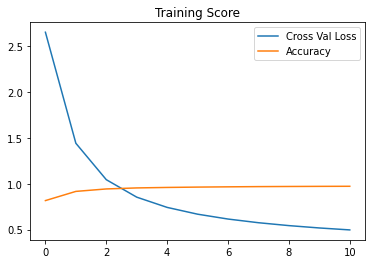

In [481]:
import  matplotlib.pyplot as plt
plt.plot(model.losses, label = 'Cross Val Loss')
plt.plot(model.accuracy, label = 'Accuracy')
plt.title('Training Score')
plt.legend()
plt.show()

## Question 8

Confirmation of misclassification

In [482]:
pred = model.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print('Test Acc: ', accuracy)

Test Acc:  0.8801


Wrong classification in test set
Test set size:  10000
False classification count:  2398
Plot title shows: (Prediction (P) / Real (R))


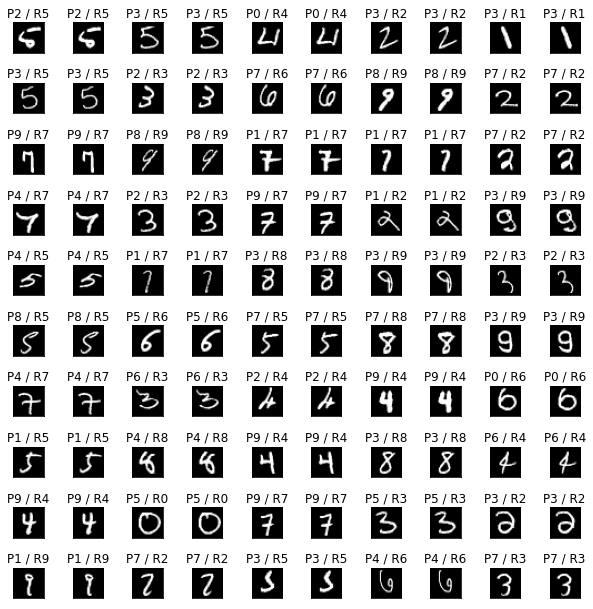

In [483]:
def show_misclassified(y_pred, y_val,X_val):
    """
    Display word classification results side by side. The display above the image is "estimated result / correct answer".
    Parameters:
    ----------
    y_pred : Estimated ndarray (n_samples,)
    y_val : Correct label of verification data (n_samples,)
    X_val : Verification data features (n_samples, n_features)
    """
    import numpy as np
    import matplotlib.pyplot as plt

    size = 10
    num = size * size # How many to display

    true_false = y_pred==y_val
    false_list = np.where(true_false==False)[0].astype(np.int32)
    print('Test set size: ', len(X_val))
    print('False classification count: ', len(false_list))
    print('Plot title shows: (Prediction (P) / Real (R))')
    if false_list.shape[0] < num:
        num = false_list.shape[0]
    fig = plt.figure(figsize=(size, size), facecolor='white')
    fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
    for i in range(num):
        ax = fig.add_subplot(size, size, i + 1, xticks=[], yticks=[])
        ax.set_title("P{} / R{}".format(np.argmax(y_pred[false_list[i]]),np.argmax(y_val[false_list[i]])))
        ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

print('Wrong classification in test set')
show_misclassified(pred, y_test, X_test)

# Documentation Suggestions

### 1. Wrong description

![wrong dim](images/nn_wrong_dim.png)
$\frac{\partial L}{\partial A_{3_j}}$ : Gradient of loss $L$ with respect to $A_3$ of j-th sample (n_nodes2,)

should be


$\frac{\partial L}{\partial A_{3_j}}$ : Gradient of loss $L$ with respect to $A_3$ of j-th sample (n_output,)

### 2. Wrong description

![wrong description layer 2](images/nn_wrong_description.png)

The highlighted line should be the description for $\frac{\partial L}{\partial Z_1}$, not  $\frac{\partial L}{\partial Z_2}$

### 3. Y Param and Prediction output Shape

![image.png](images\nn_y.png)
![image.png](images\nn_y_val.png)

the label $Y$ is one hot encoded so shape description should be (n_samples, n_output)

![image.png](images\nn_pred.png)

similar to the output shape of prediction method, should be (n_samples, n_output), not (n_samples, 1)